In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 1. 위도, 경도 다 버리고 발생일로 9개 df 다 1년 위에 합치기

In [7]:
import pandas as pd

# 날짜 범위 생성
start_date = '2022-01-01'
end_date = '2022-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# 날짜 범위를 가지고 있는 데이터프레임 생성
date_df = pd.DataFrame({'날짜': date_range})

# 9개의 엑셀 파일 목록
excel_files = ['꼬리물기.xlsx', '불법유턴.xlsx', '불법좌회전.xlsx', '신호위반.xlsx', '역주행.xlsx', '정지선침범.xlsx', '중앙선침범.xlsx', '지정차로위반.xlsx', '진로변경방법위반.xlsx']

# 각 엑셀 파일을 순회하면서 데이터를 추출하고 열을 추가
for file in excel_files:
    df = pd.read_excel(file)
    
    # '위도'와 '경도' 열을 삭제
    df = df.drop(columns=['위도', '경도'])
    
    # 엑셀 파일명에서 .xlsx를 제거하고 열 이름으로 사용
    column_name = file.replace('.xlsx', '')
    
    # '발생일' 열을 datetime64[ns] 형식으로 변환
    df['발생일'] = pd.to_datetime(df['발생일'])
    
    # '발생일' 열의 값들을 세서 발생횟수 데이터프레임을 만듭니다.
    date_counts = df['발생일'].value_counts().reset_index()
    date_counts.columns = ['날짜', column_name]
    
    # '날짜' 데이터프레임과 병합
    date_df = date_df.merge(date_counts, on='날짜', how='left')

# 누락된 값은 0으로 채움
date_df = date_df.fillna(0)
df = date_df

# 결과 데이터프레임 출력
df


,날짜,꼬리물기,불법유턴,불법좌회전,신호위반,역주행,정지선침범,중앙선침범,지정차로위반,진로변경방법위반
0,2022-01-01,0.0,19.0,50.0,58.0,11.0,47.0,32.0,3.0,75.0
1,2022-01-02,1.0,21.0,43.0,96.0,12.0,51.0,40.0,8.0,65.0
2,2022-01-03,2.0,27.0,88.0,125.0,10.0,54.0,39.0,19.0,102.0
3,2022-01-04,2.0,24.0,103.0,137.0,8.0,58.0,35.0,23.0,110.0
4,2022-01-05,3.0,30.0,104.0,157.0,13.0,46.0,64.0,24.0,114.0
...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,7.0,48.0,153.0,203.0,14.0,37.0,63.0,20.0,252.0
361,2022-12-28,14.0,38.0,148.0,161.0,13.0,52.0,56.0,31.0,208.0
362,2022-12-29,7.0,36.0,147.0,191.0,18.0,39.0,51.0,25.0,203.0
363,2022-12-30,7.0,29.0,138.0,155.0,18.0,51.0,71.0,15.0,221.0


## 시각화

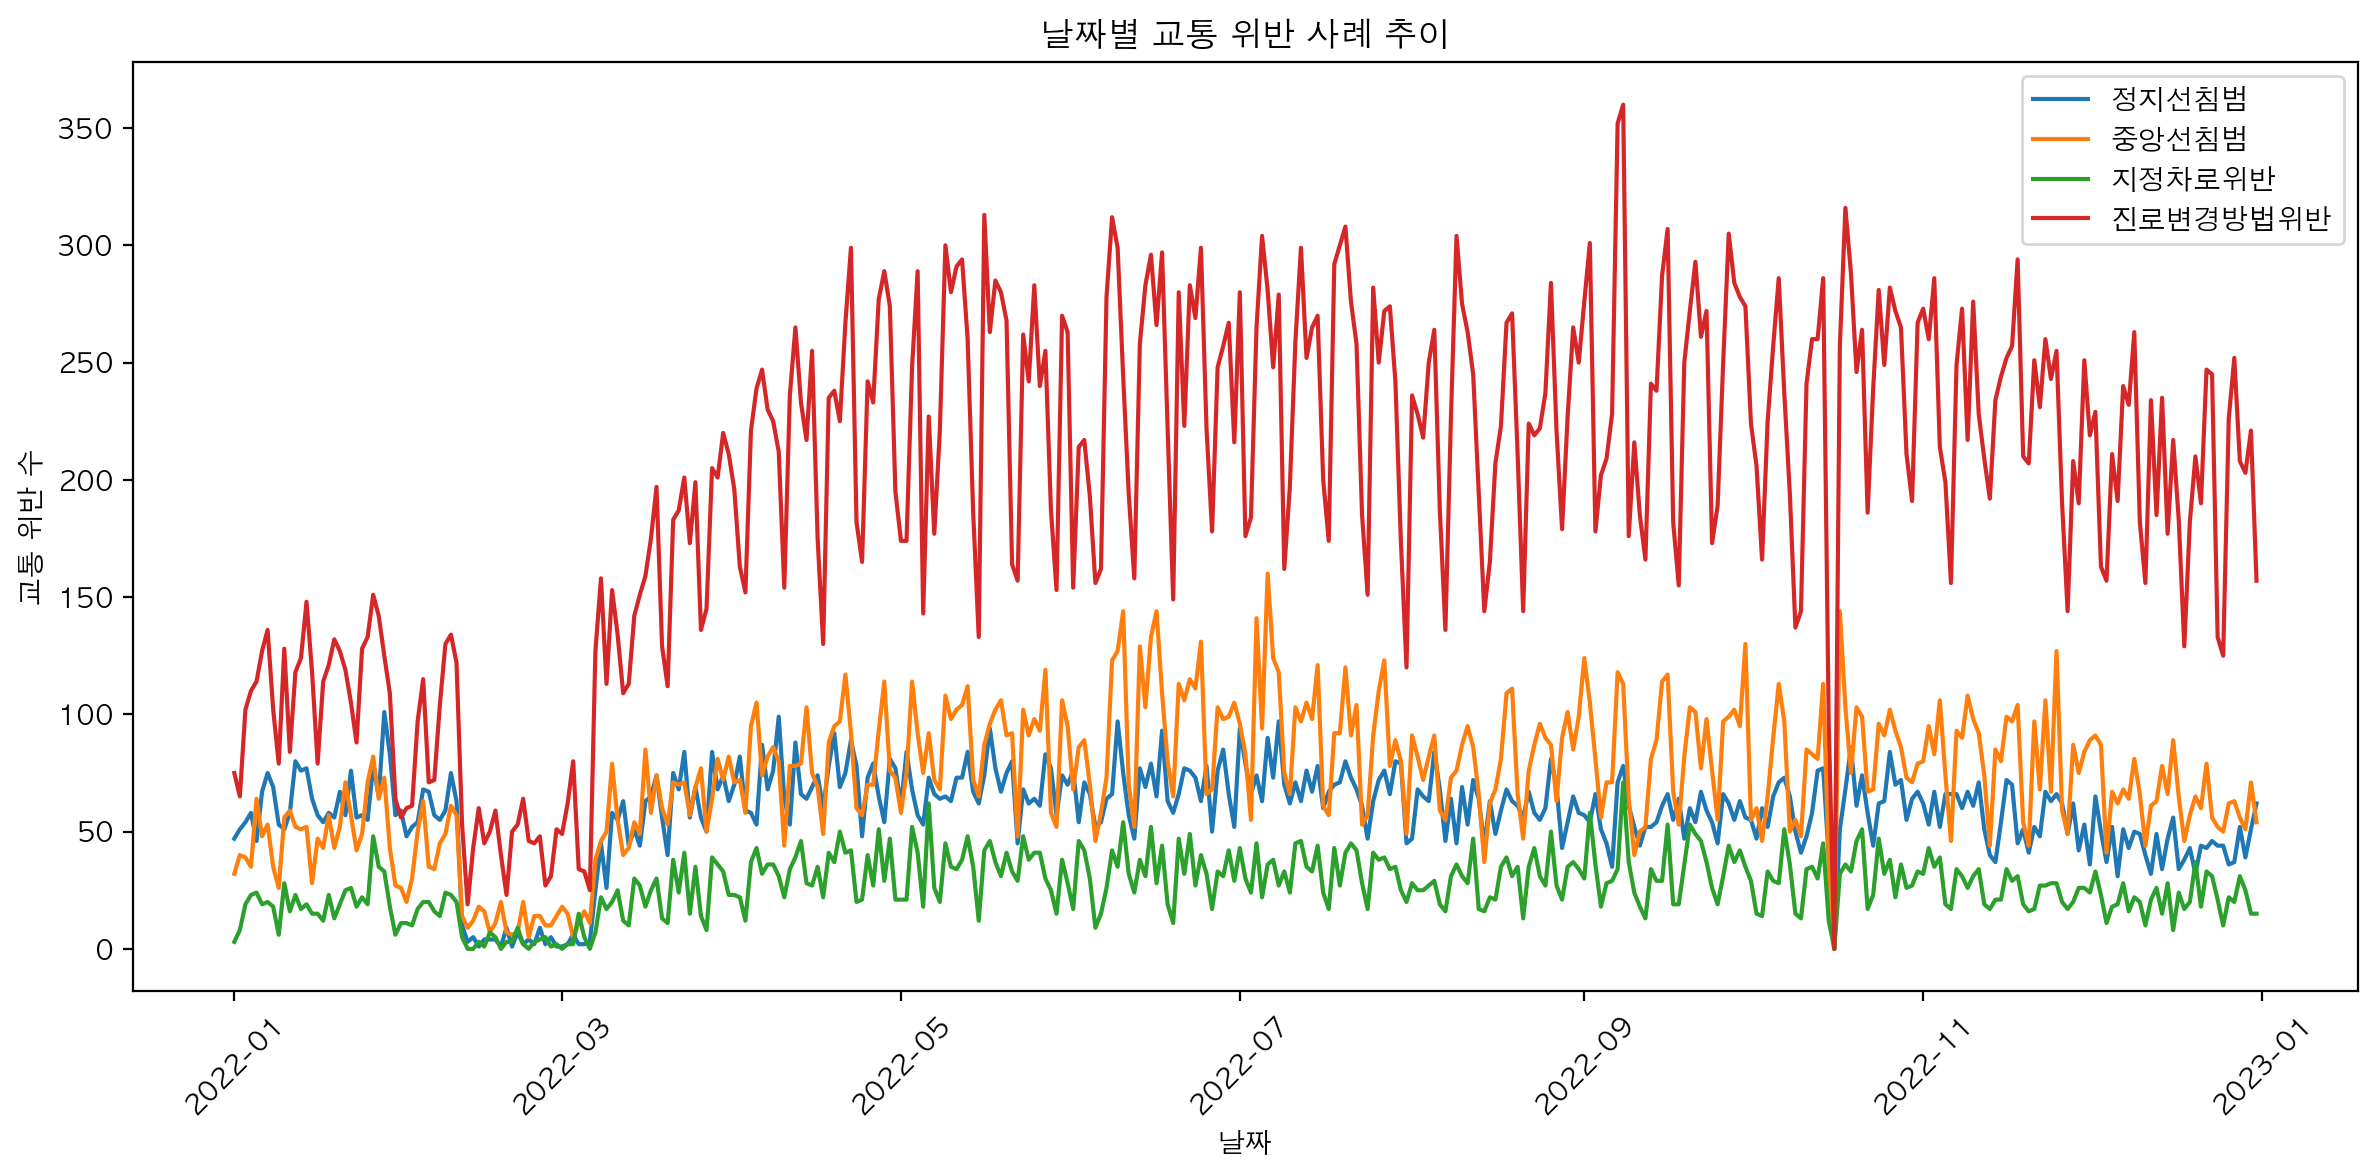

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['날짜'], df['정지선침범'], label='정지선침범')
plt.plot(df['날짜'], df['중앙선침범'], label='중앙선침범')
plt.plot(df['날짜'], df['지정차로위반'], label='지정차로위반')
plt.plot(df['날짜'], df['진로변경방법위반'], label='진로변경방법위반')
plt.xlabel('날짜')
plt.ylabel('교통 위반 수')
plt.title('날짜별 교통 위반 사례 추이')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


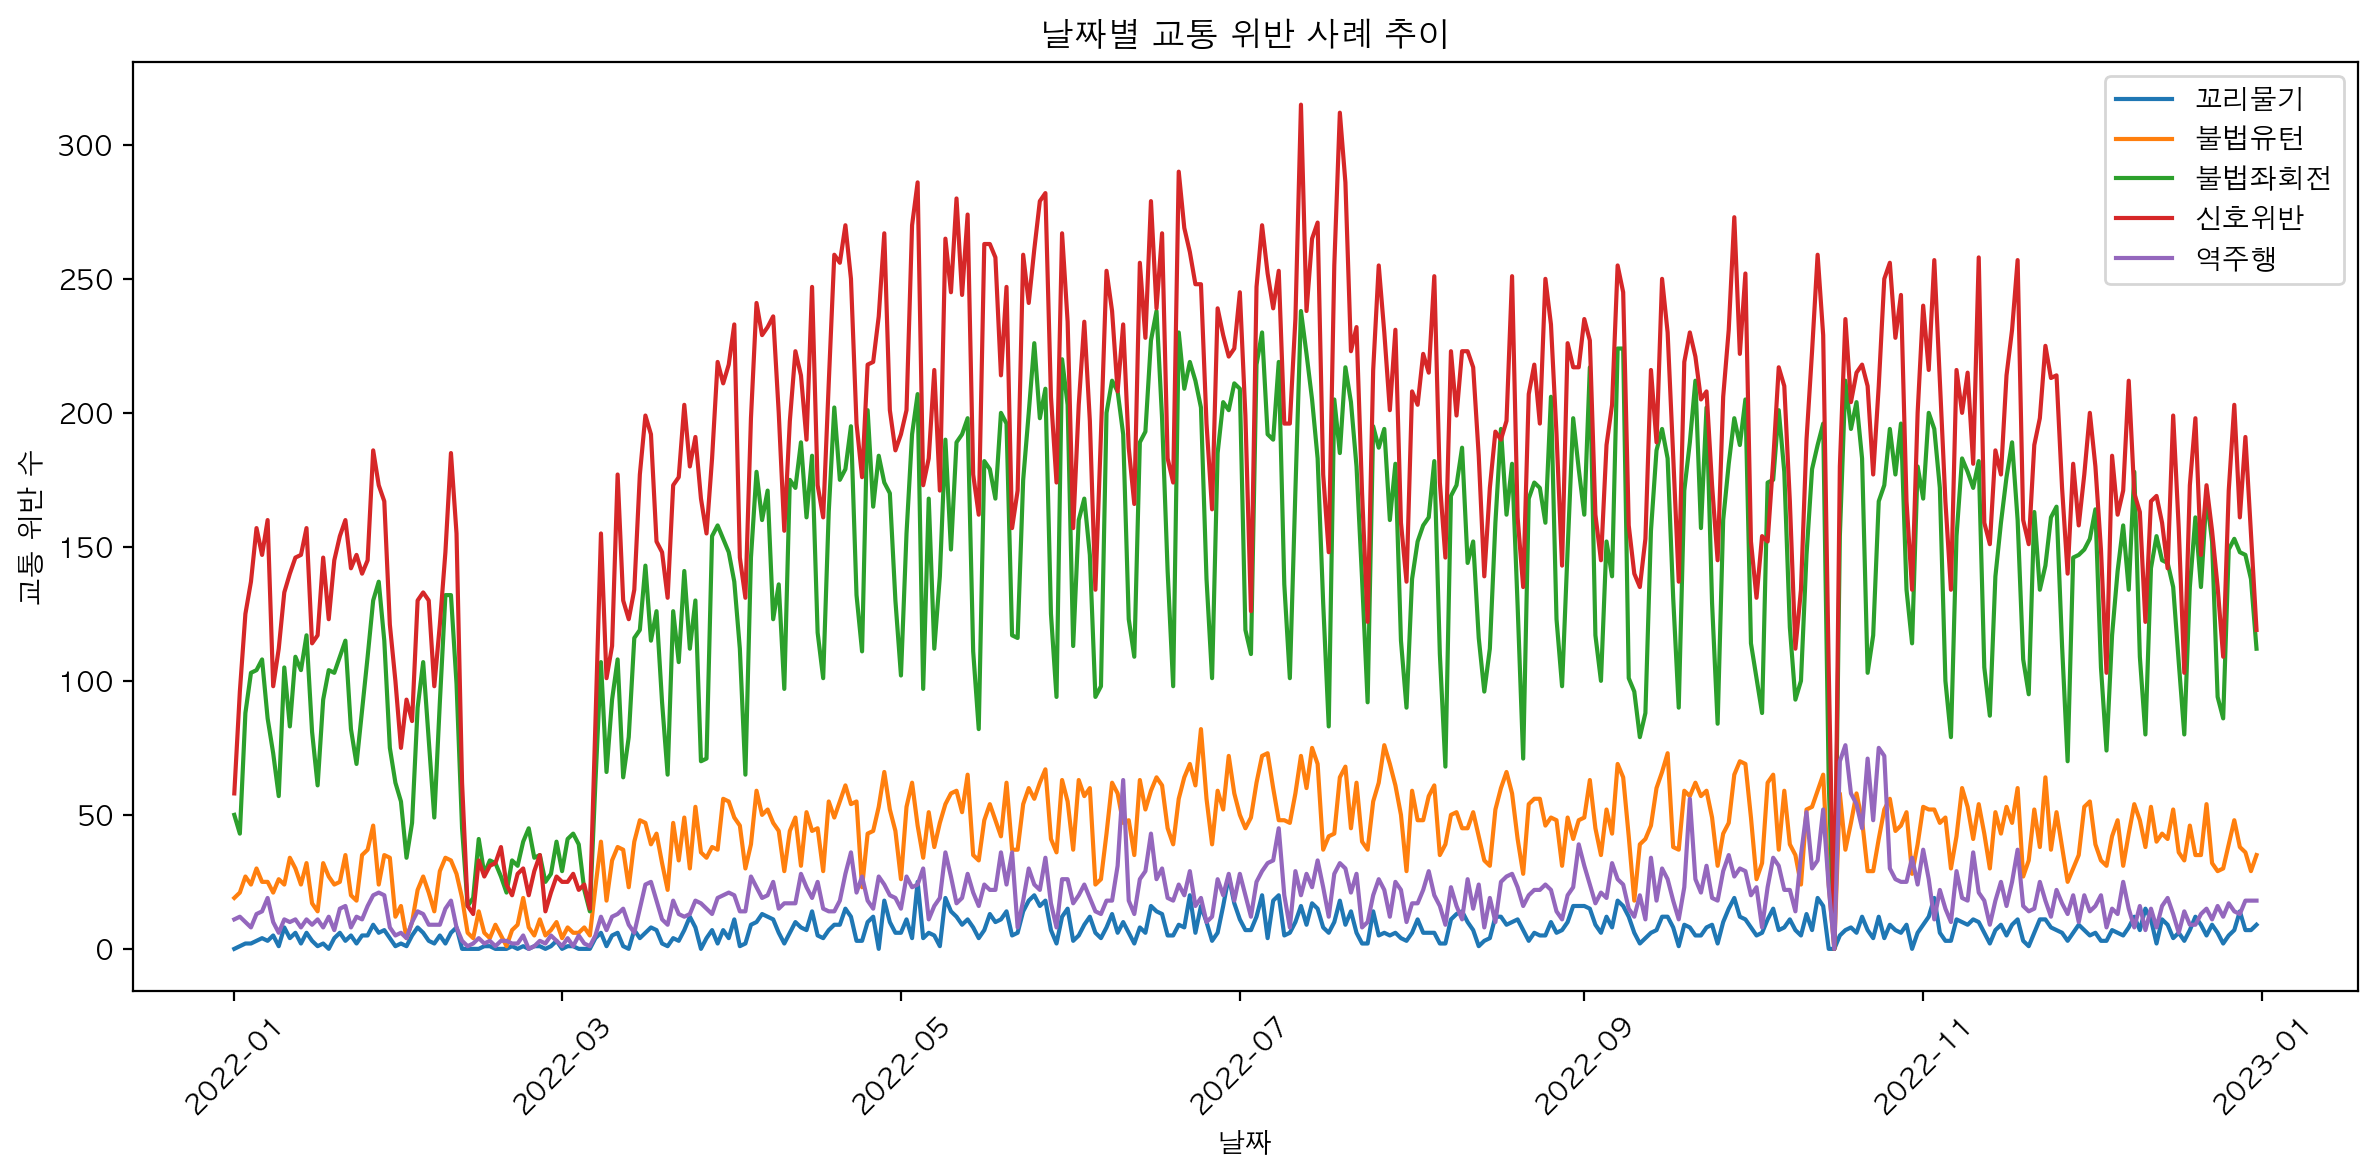

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['날짜'], df['꼬리물기'], label='꼬리물기')
plt.plot(df['날짜'], df['불법유턴'], label='불법유턴')
plt.plot(df['날짜'], df['불법좌회전'], label='불법좌회전')
plt.plot(df['날짜'], df['신호위반'], label='신호위반')
plt.plot(df['날짜'], df['역주행'], label='역주행')
plt.xlabel('날짜')
plt.ylabel('교통 위반 수')
plt.title('날짜별 교통 위반 사례 추이')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


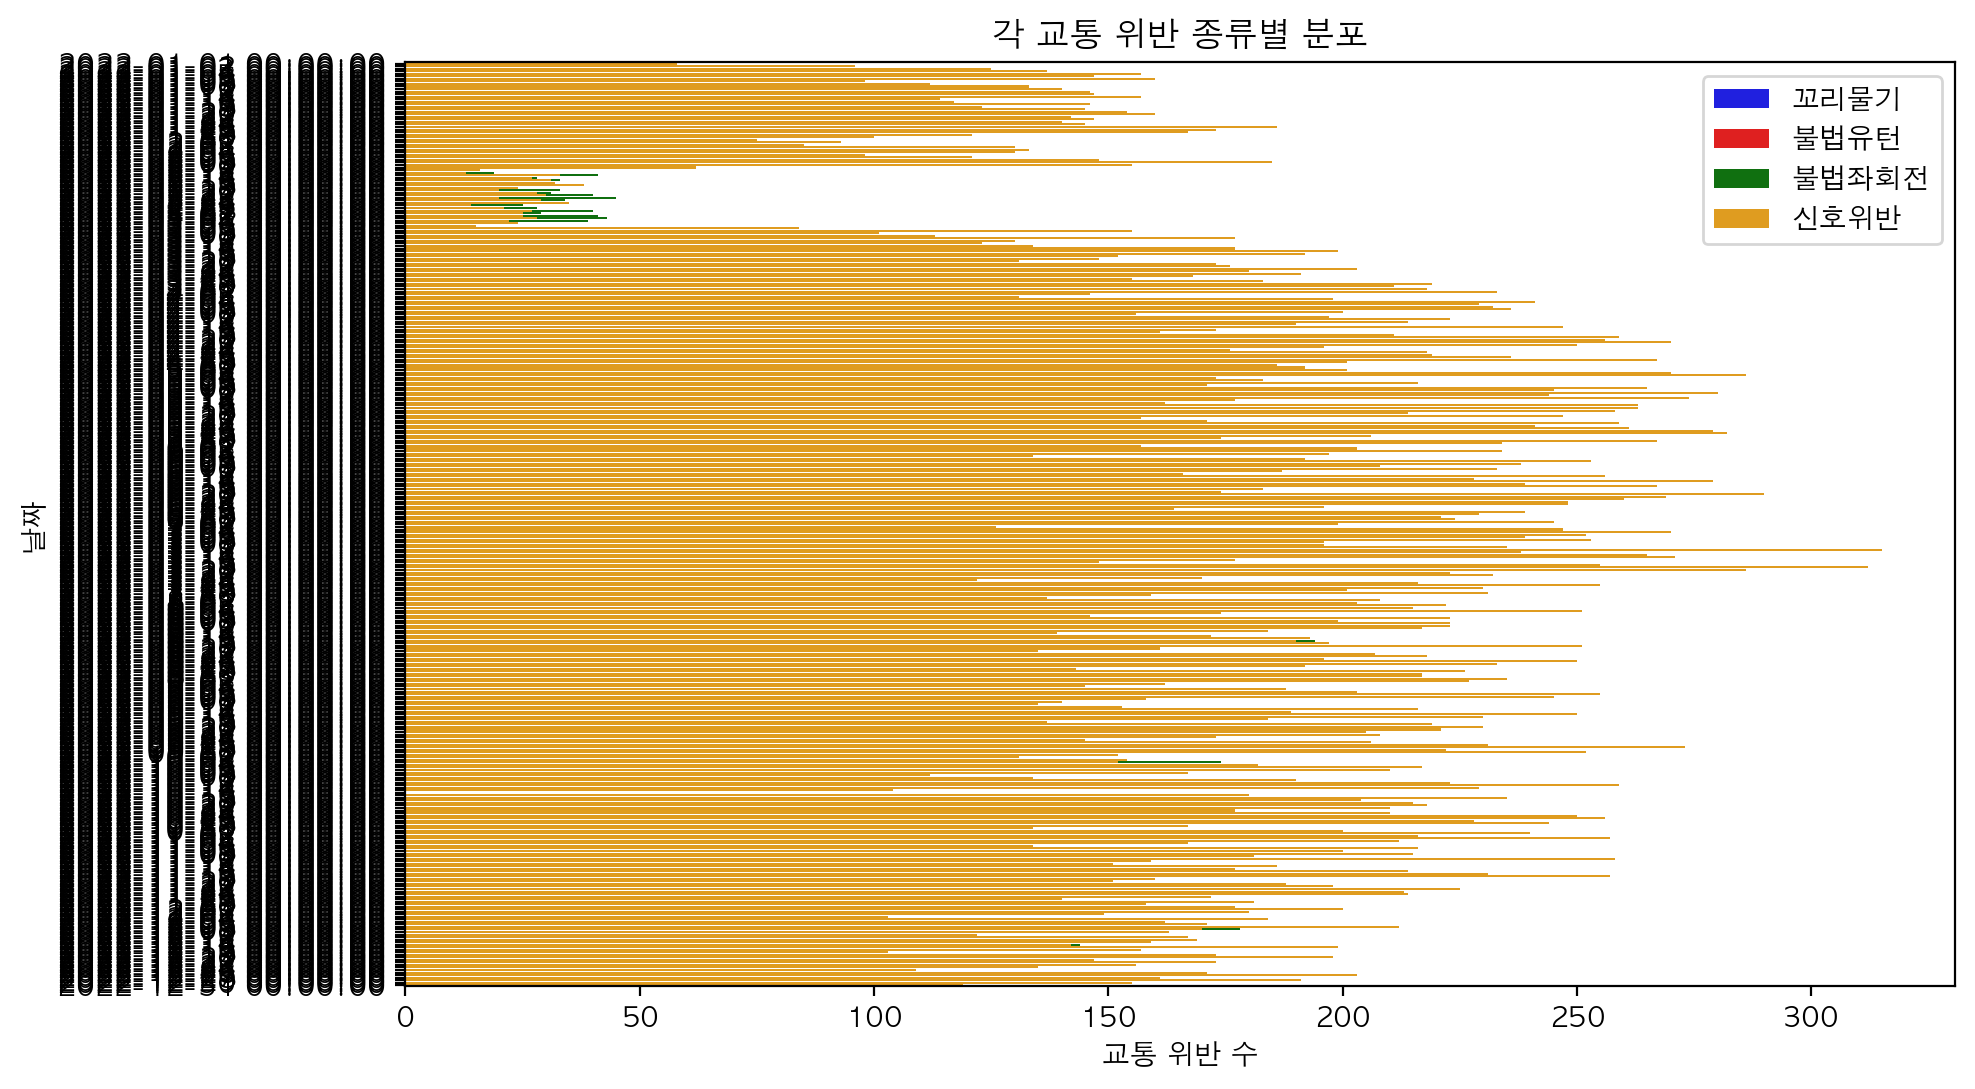

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='꼬리물기', y='날짜', color='blue', label='꼬리물기')
sns.barplot(data=df, x='불법유턴', y='날짜', color='red', label='불법유턴')
sns.barplot(data=df, x='불법좌회전', y='날짜', color='green', label='불법좌회전')
sns.barplot(data=df, x='신호위반', y='날짜', color='orange', label='신호위반')
plt.xlabel('교통 위반 수')
plt.ylabel('날짜')
plt.title('각 교통 위반 종류별 분포')
plt.legend()
plt.show()


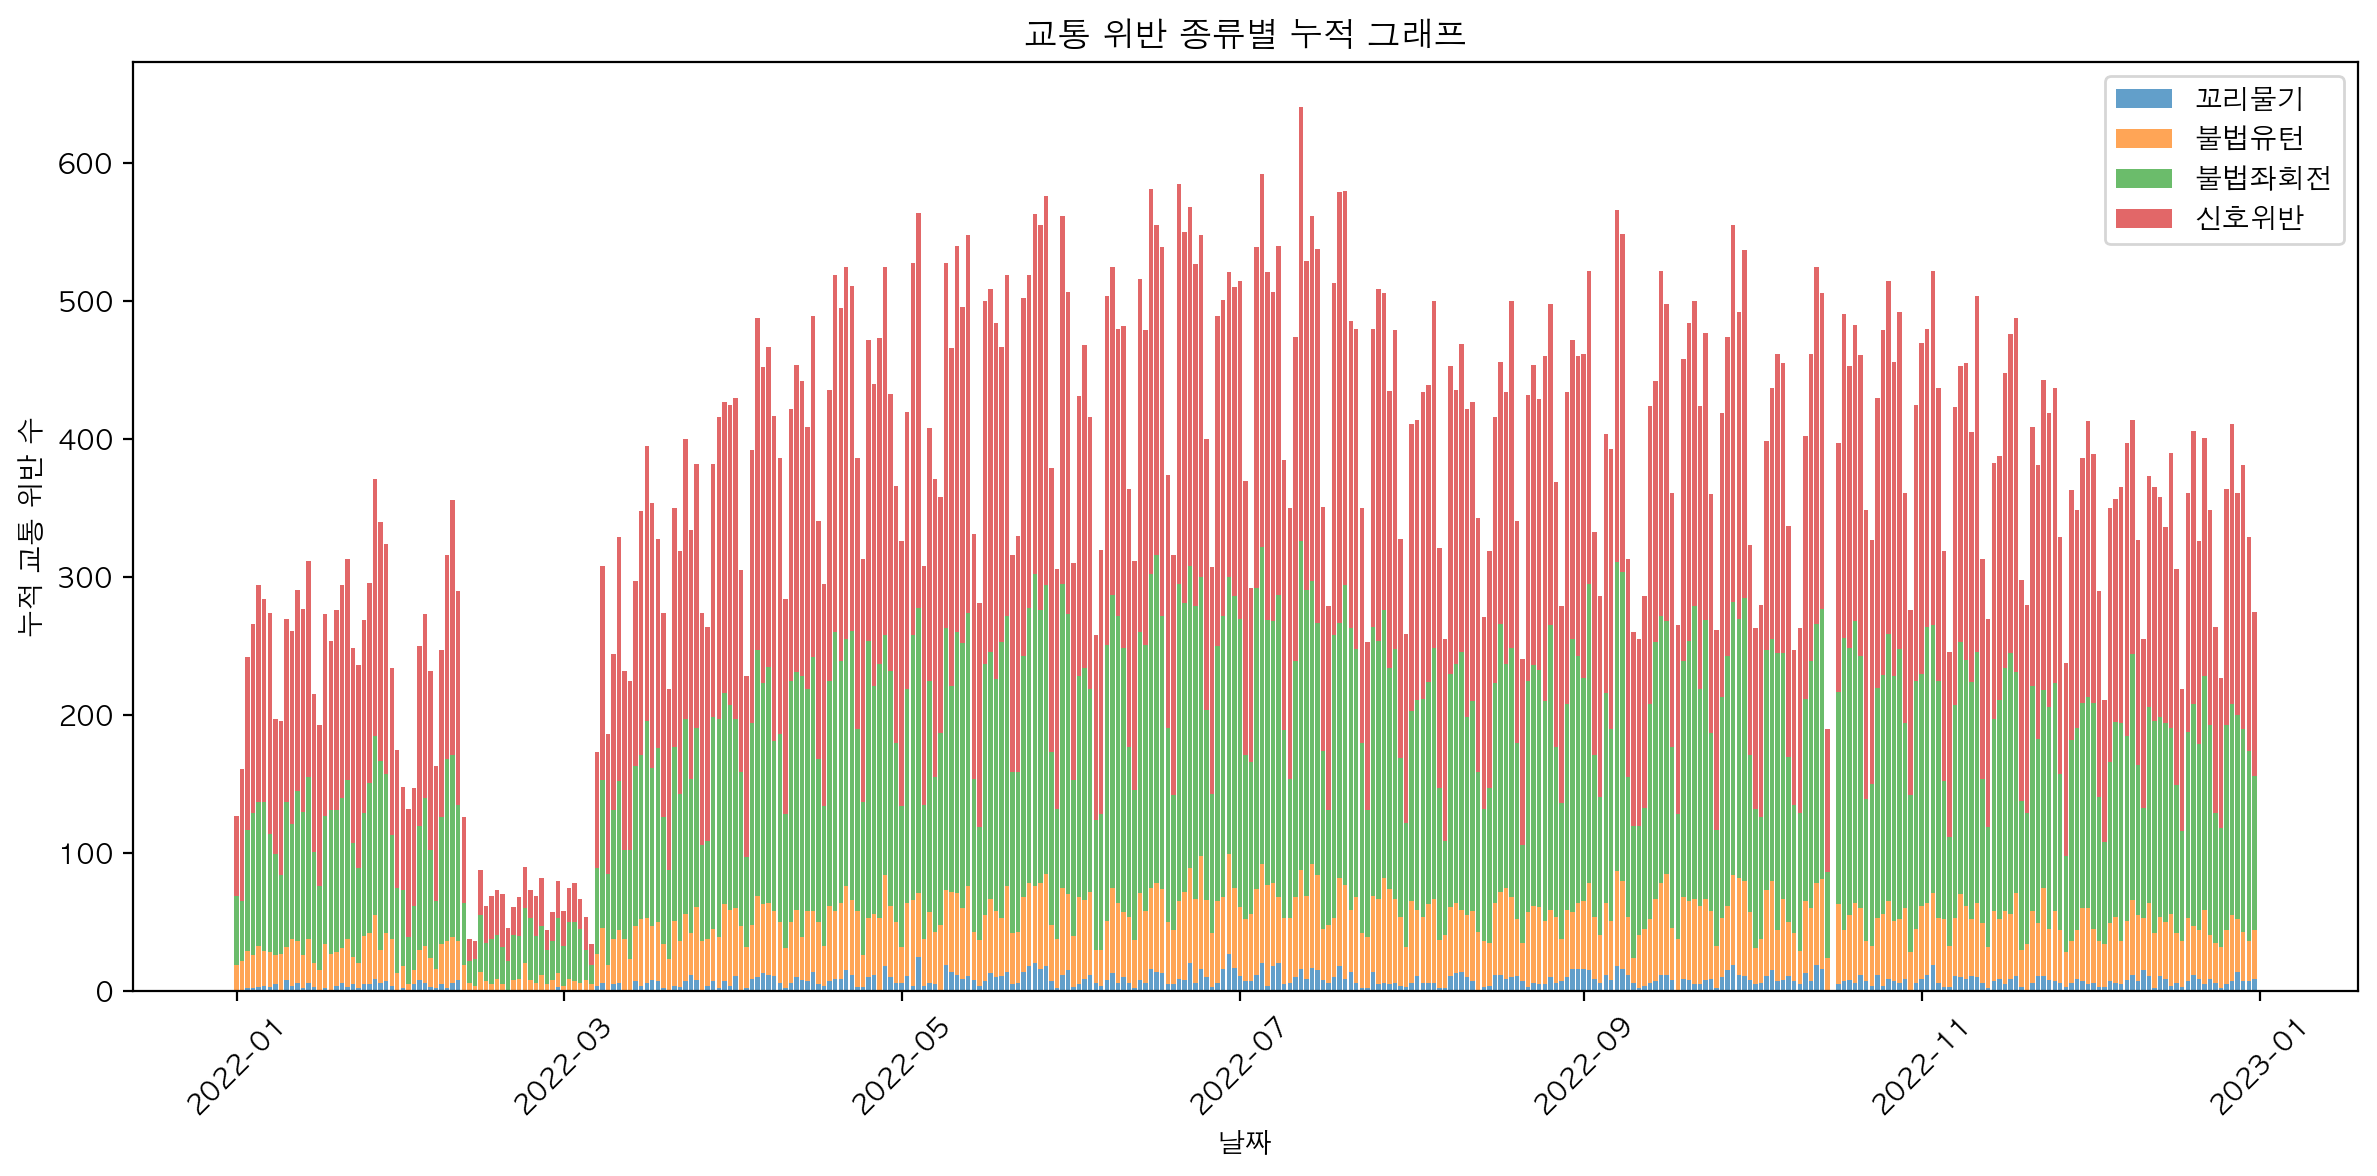

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(df['날짜'], df['꼬리물기'], label='꼬리물기', alpha=0.7)
plt.bar(df['날짜'], df['불법유턴'], bottom=df['꼬리물기'], label='불법유턴', alpha=0.7)
plt.bar(df['날짜'], df['불법좌회전'], bottom=df['불법유턴']+df['꼬리물기'], label='불법좌회전', alpha=0.7)
plt.bar(df['날짜'], df['신호위반'], bottom=df['불법좌회전']+df['불법유턴']+df['꼬리물기'], label='신호위반', alpha=0.7)
plt.xlabel('날짜')
plt.ylabel('누적 교통 위반 수')
plt.title('교통 위반 종류별 누적 그래프')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


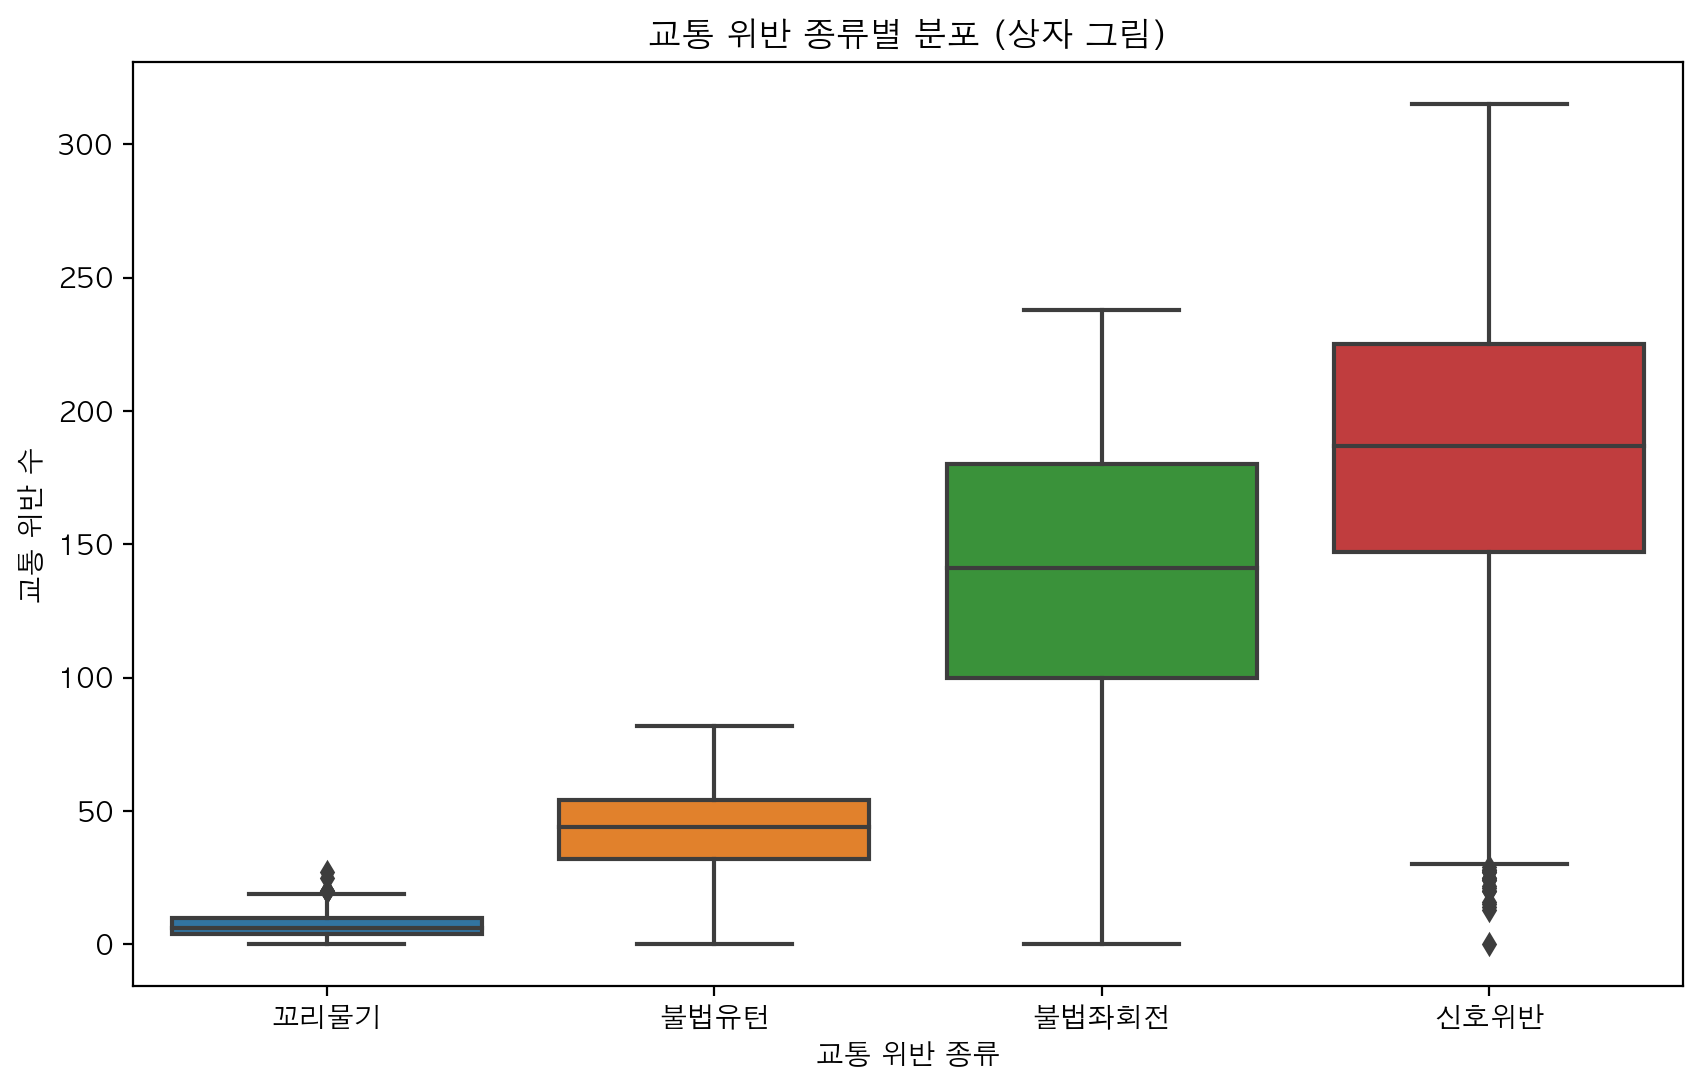

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['꼬리물기', '불법유턴', '불법좌회전', '신호위반']])
plt.xlabel('교통 위반 종류')
plt.ylabel('교통 위반 수')
plt.title('교통 위반 종류별 분포 (상자 그림)')
plt.show()


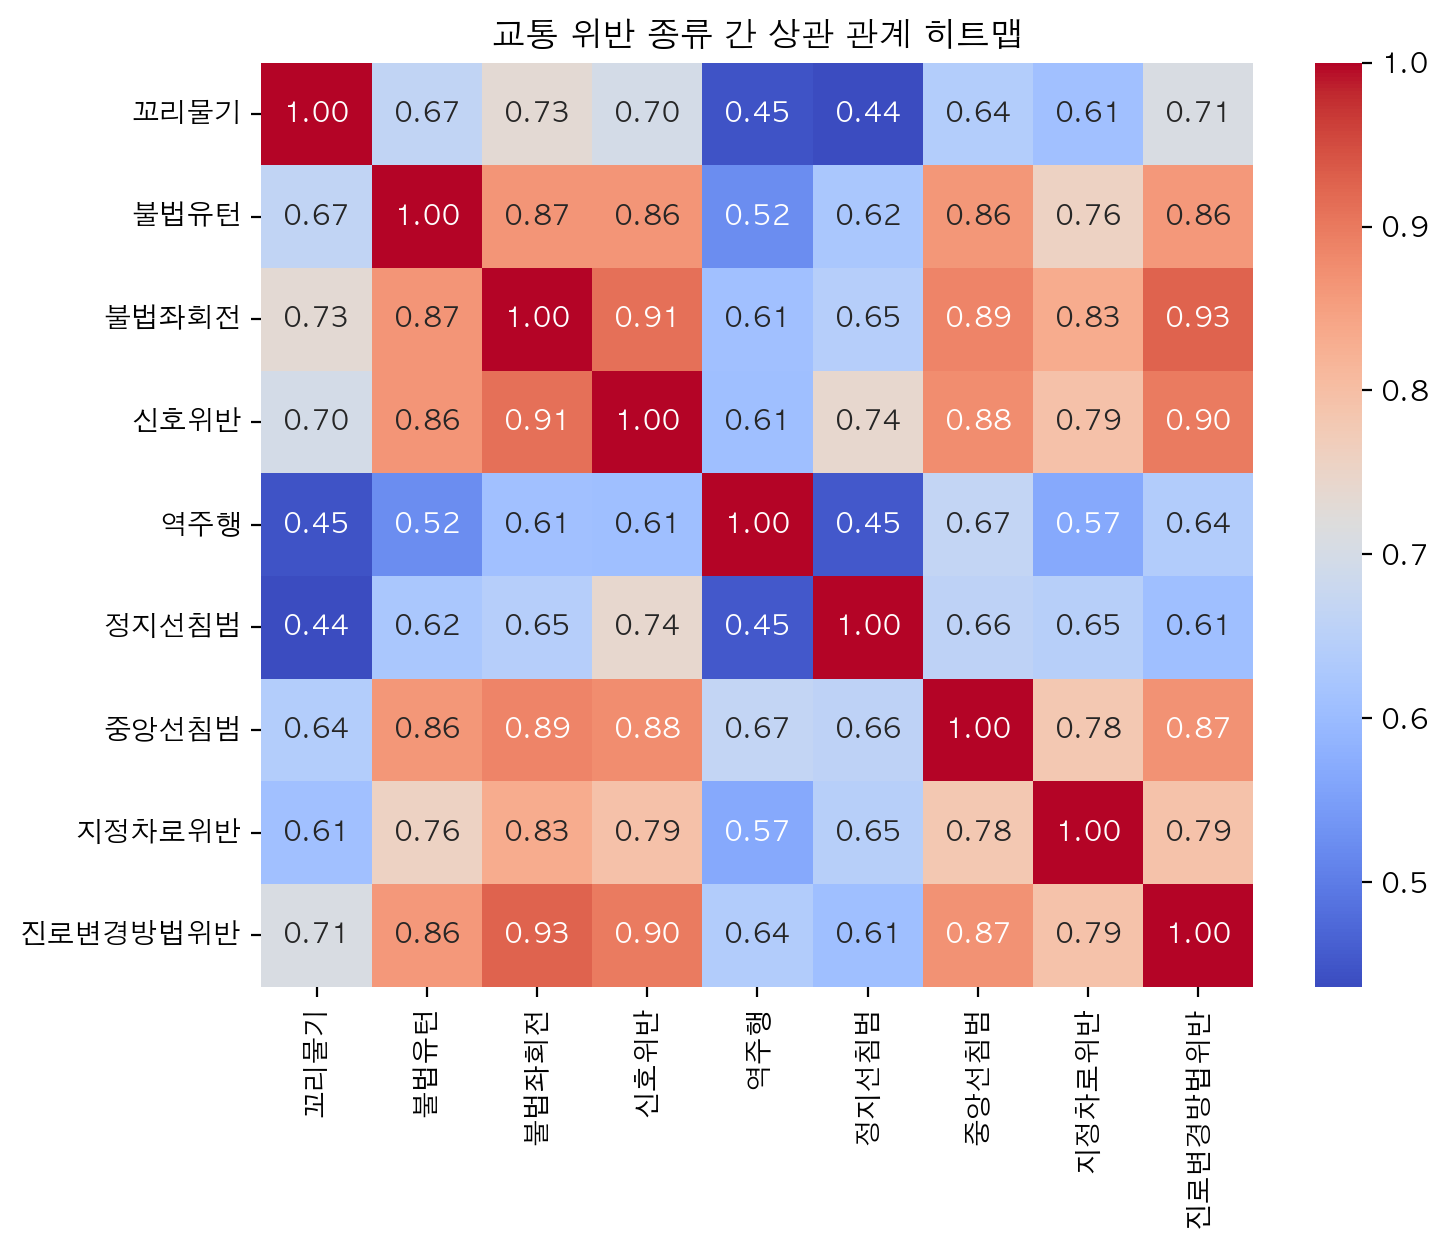

In [14]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['꼬리물기', '불법유턴', '불법좌회전', '신호위반', '역주행', '정지선침범', '중앙선침범', '지정차로위반', '진로변경방법위반']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('교통 위반 종류 간 상관 관계 히트맵')
plt.show()


### 엑셀 파일로 저장

In [17]:
# 데이터프레임을 엑셀 파일로 저장
output_file = 'output_data.xlsx'
date_df.to_excel(output_file, index=False)

print(f'Data saved to {output_file}')

Data saved to output_data.xlsx


### 그냥 조금 예쁘게 표시

In [10]:
# Pandas DataFrame을 예쁘게 출력하기 위해 옵션 설정
pd.set_option('display.float_format', '{:.0f}'.format)  # 소수점 이하 자릿수 제거
pd.set_option('display.max_columns', None)  # 모든 열 표시
pd.set_option('display.expand_frame_repr', False)  # 표가 너무 긴 경우 자동 줄 바꿈 비활성화

# 결과 데이터프레임 출력
print(date_df.to_string(index=False))


        날짜  꼬리물기  불법유턴  불법좌회전  신호위반  역주행  정지선침범  중앙선침범  지정차로위반  진로변경방법위반
2022-01-01     0    19     50    58   11     47     32       3        75
2022-01-02     1    21     43    96   12     51     40       8        65
2022-01-03     2    27     88   125   10     54     39      19       102
2022-01-04     2    24    103   137    8     58     35      23       110
2022-01-05     3    30    104   157   13     46     64      24       114
2022-01-06     4    25    108   147   14     67     48      19       127
2022-01-07     3    25     86   160   19     75     53      20       136
2022-01-08     5    21     73    98   10     69     35      18       102
2022-01-09     1    26     57   112    6     53     26       6        79
2022-01-10     8    24    105   133   11     51     56      28       128
2022-01-11     4    34     83   140   10     58     59      16        84
2022-01-12     6    30    109   146   11     80     52      23       118
2022-01-13     2    24    104   147    8     76    

In [11]:
# Markdown 형식으로 데이터프레임 출력
markdown_table = date_df.to_markdown(index=False)
print(markdown_table)

| 날짜                |   꼬리물기 |   불법유턴 |   불법좌회전 |   신호위반 |   역주행 |   정지선침범 |   중앙선침범 |   지정차로위반 |   진로변경방법위반 |
|:--------------------|-----------:|-----------:|-------------:|-----------:|---------:|-------------:|-------------:|---------------:|-------------------:|
| 2022-01-01 00:00:00 |          0 |         19 |           50 |         58 |       11 |           47 |           32 |              3 |                 75 |
| 2022-01-02 00:00:00 |          1 |         21 |           43 |         96 |       12 |           51 |           40 |              8 |                 65 |
| 2022-01-03 00:00:00 |          2 |         27 |           88 |        125 |       10 |           54 |           39 |             19 |                102 |
| 2022-01-04 00:00:00 |          2 |         24 |          103 |        137 |        8 |           58 |           35 |             23 |                110 |
| 2022-01-05 00:00:00 |          3 |         30 |          104 |        157 |       13 |           46 | 

## 2. 날씨 데이터 활용
- 9개 저장한 거 이름 date_df
- 날씨데이터 이름

In [ ]:
df = pd.read_excel(file)